In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
rec_média = 170
rec_desv = 20
iterações = 1000

In [3]:
rec = np.random.normal(rec_média,rec_desv,iterações)
rec

array([160.13431628, 135.9816453 , 178.80296746, 152.26247744,
       193.89747282, 183.08139906, 156.01809466, 167.12903597,
       213.63178735, 183.11040398, 181.85718364, 163.59506824,
       213.25181512, 190.87778434, 200.72208109, 175.31307162,
       162.84466606, 174.71047356, 193.28727658, 172.439189  ,
       158.29978217, 185.86364951, 158.84729344, 175.22096121,
       137.65659403, 131.09607644, 127.78196326, 197.86921065,
       185.47666324, 178.87504354, 192.04527894, 175.86792832,
       156.43401619, 173.69734978, 176.33277193, 142.64318241,
       146.79222485, 201.57612392, 180.04309576, 211.87892917,
       136.06864779, 165.29104172, 151.66907055, 177.84280756,
       143.41404225, 158.86043645, 172.49278624, 154.64404289,
       183.38320618, 179.6957025 , 154.08966711, 141.4414403 ,
       155.58428007, 187.56107871, 171.94310088, 169.59715205,
       143.41280457, 174.46055103, 143.47110776, 171.22364012,
       167.2575766 , 162.76022101, 147.77889822, 151.32

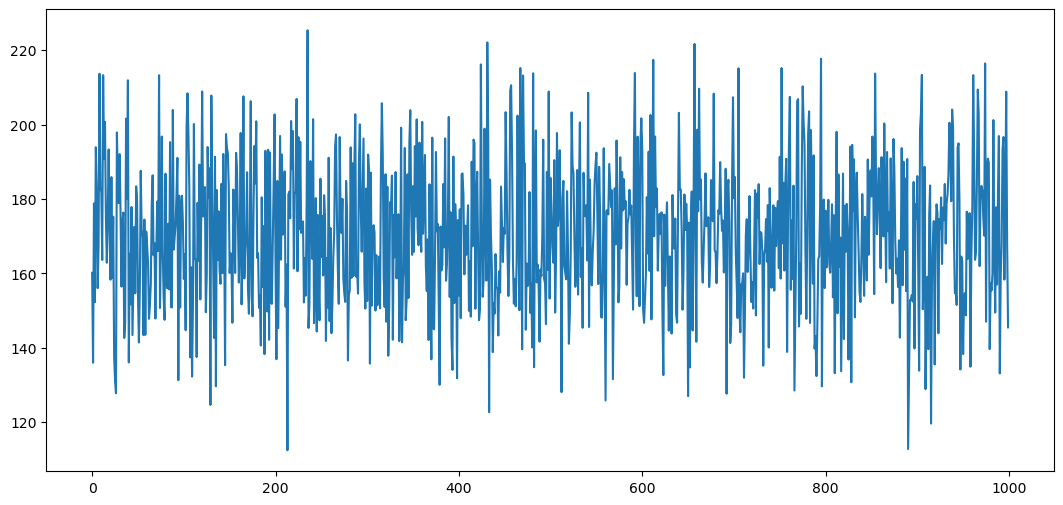

In [4]:
plt.figure(figsize = (13,6))
plt.plot(rec)

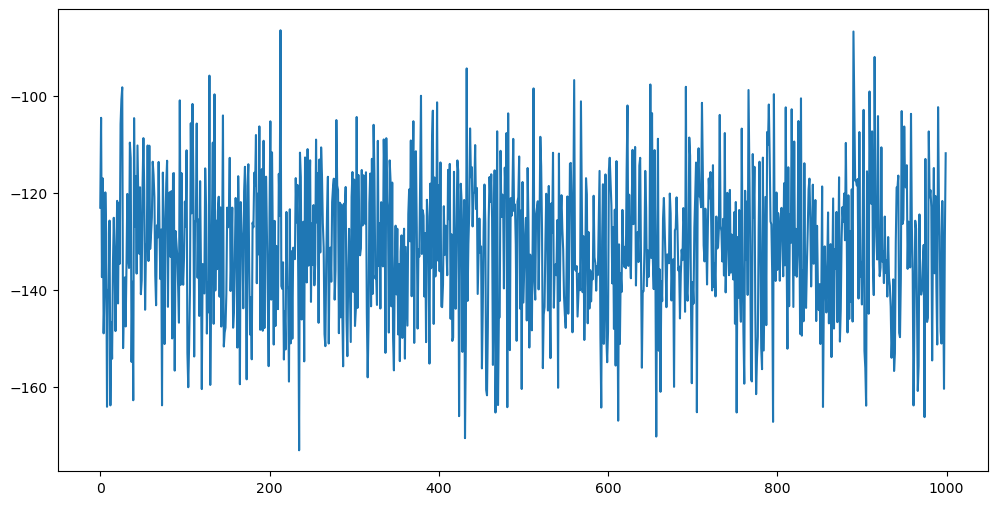

In [5]:
Cmv = - (rec*np.random.normal(0.6,0.1))
plt.figure(figsize = (12,6))
plt.plot(Cmv)

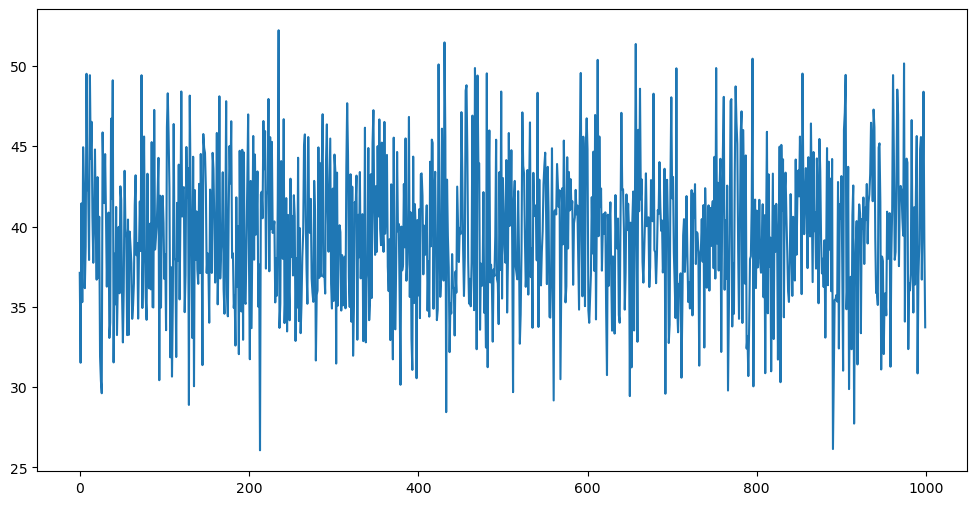

In [6]:
Lucro_Bruto = rec + Cmv
plt.figure(figsize = (12,6))
plt.plot(Lucro_Bruto)

In [7]:
max(Lucro_Bruto)

52.22116154471985

<function matplotlib.pyplot.show(close=None, block=None)>

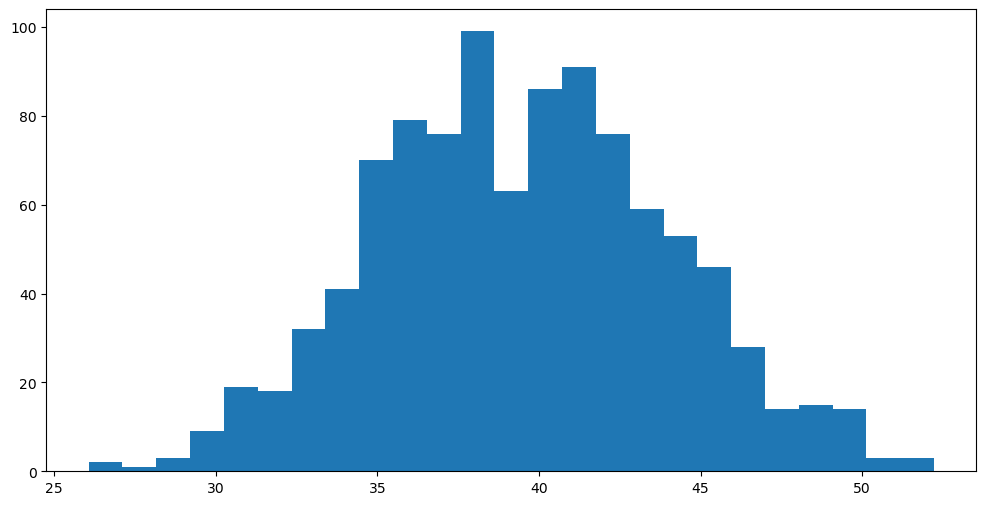

In [8]:
plt.figure(figsize = (12,6))
plt.hist(Lucro_Bruto, bins= 25)
plt.show

### Previsão preços AAPL Montecarlo

In [9]:
import pandas as pd
from scipy.stats import norm
%matplotlib inline
import yfinance as yf

In [10]:
AAPL = yf.download(tickers='AAPL', start='2000-1-1')['Adj Close']
AAPL

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03      0.847207
2000-01-04      0.775779
2000-01-05      0.787131
2000-01-06      0.719014
2000-01-07      0.753073
                 ...    
2023-11-10    186.399994
2023-11-13    184.800003
2023-11-14    187.440002
2023-11-15    188.009995
2023-11-16    189.710007
Name: Adj Close, Length: 6008, dtype: float64

In [11]:
rtn_aapl = np.log(1+AAPL.pct_change())
rtn_aapl

Date
2000-01-03         NaN
2000-01-04   -0.088077
2000-01-05    0.014527
2000-01-06   -0.090514
2000-01-07    0.046281
                ...   
2023-11-10    0.022955
2023-11-13   -0.008621
2023-11-14    0.014185
2023-11-15    0.003036
2023-11-16    0.009002
Name: Adj Close, Length: 6008, dtype: float64

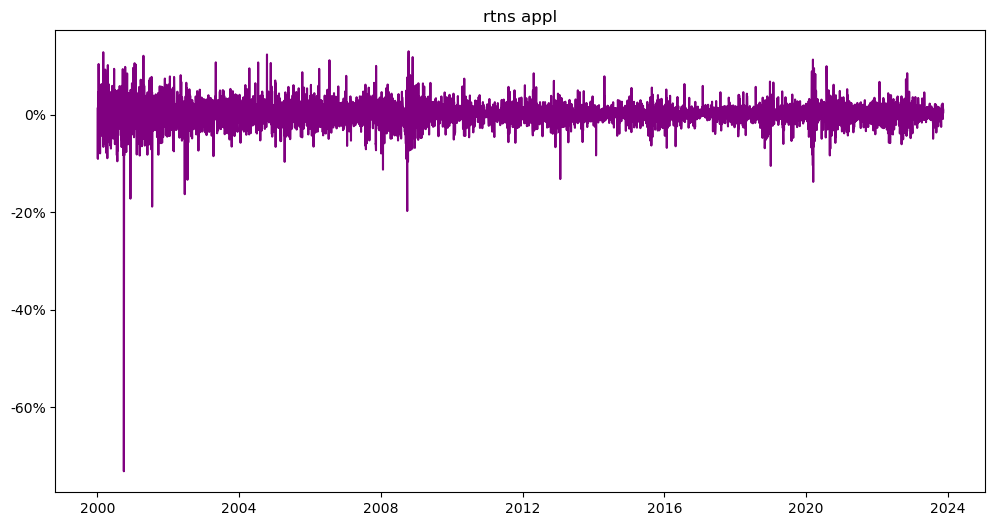

In [12]:
plt.figure(figsize = (12,6))
plt.plot(rtn_aapl, color = 'purple')
plt.title('rtns appl')
plt.yticks((0.0,-0.2,-0.4,-0.6),('0%', '-20%','-40%', '-60%'))
plt.show()

In [13]:
aapl_mean = rtn_aapl.mean()
aapl_mean

0.0009008335588788103

In [14]:
aapl_desv = rtn_aapl.std()
aapl_desv

0.02566487144555724

In [15]:
aapl_var = rtn_aapl.var()
aapl_var

0.0006586856263169793

In [16]:
#drift AAPL
drift_aapl = aapl_mean + 0.5*(aapl_var)
drift_aapl

0.0012301763720373

In [17]:
drift = np.array(drift_aapl)
drift

array(0.00123018)

In [18]:
std_aapl = np.array(aapl_desv)
std_aapl

array(0.02566487)

In [19]:
norm.ppf(0.95)

1.6448536269514722

In [20]:
x = np.random.rand(10,2)
x

array([[0.15822232, 0.02287604],
       [0.41811226, 0.81045534],
       [0.32455349, 0.85443278],
       [0.88903878, 0.38121221],
       [0.30535942, 0.01146102],
       [0.4915491 , 0.70903495],
       [0.1746961 , 0.76719582],
       [0.16626702, 0.51627217],
       [0.8287633 , 0.47113802],
       [0.80230823, 0.5180148 ]])

In [21]:
z = norm.ppf(x)
z

array([[-1.00179081, -1.99767347],
       [-0.20672514,  0.87957548],
       [-0.45500314,  1.05563624],
       [ 1.22143217, -0.30229863],
       [-0.50904762, -2.27473139],
       [-0.02118485,  0.55056763],
       [-0.93576889,  0.72964312],
       [-0.96902235,  0.0407996 ],
       [ 0.9492895 , -0.07240947],
       [ 0.84989487,  0.04517177]])

In [22]:
t_intervalos = 1000
interações = 10

In [23]:
daily_rtns_aapl = np.exp(drift + std_aapl*(norm.ppf(np.random.rand(t_intervalos, interações))))
daily_rtns_aapl

array([[1.0135122 , 0.98058941, 0.97243697, ..., 1.00650358, 0.98241524,
        1.0249819 ],
       [1.01060191, 1.00461178, 1.0094679 , ..., 1.02880902, 0.97362719,
        1.00407429],
       [1.02002808, 0.99909452, 0.9890174 , ..., 1.00344582, 0.99805509,
        0.9760415 ],
       ...,
       [0.98322736, 0.97195432, 0.97248705, ..., 0.9790945 , 1.00179506,
        0.99962707],
       [1.0292729 , 1.04929812, 1.01445368, ..., 1.00515824, 1.02411627,
        0.98576345],
       [0.99098639, 1.03606237, 1.01383681, ..., 0.99999262, 0.98136951,
        0.97873064]])

In [24]:
S0 = AAPL.iloc[-1]
S0

189.7100067138672

In [25]:
price_list = np.zeros_like(daily_rtns_aapl)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0]= S0
price_list

array([[189.71000671, 189.71000671, 189.71000671, ..., 189.71000671,
        189.71000671, 189.71000671],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [27]:
for t in range(1,t_intervalos):
    price_list[t] = price_list[t-1]*daily_rtns_aapl[t]#------formula do slide 23
price_list
#gera lista de preços completa

array([[ 189.71000671,  189.71000671,  189.71000671, ...,  189.71000671,
         189.71000671,  189.71000671],
       [ 191.72129591,  190.58490837,  191.50616122, ...,  195.17536561,
         184.70682122,  190.48294093],
       [ 195.56110453,  190.41233687,  189.40292511, ...,  195.84790407,
         184.3475829 ,  185.91925586],
       ...,
       [2751.04417863,  491.69003015, 1936.37797104, ..., 1818.20063289,
         279.06788503, 2768.99691426],
       [2831.57522604,  515.92942245, 1964.36575033, ..., 1827.57935618,
         285.79796036, 2729.57594884],
       [2806.05251464,  534.53505829, 1991.54631166, ..., 1827.56587345,
         280.47340506, 2671.51960466]])

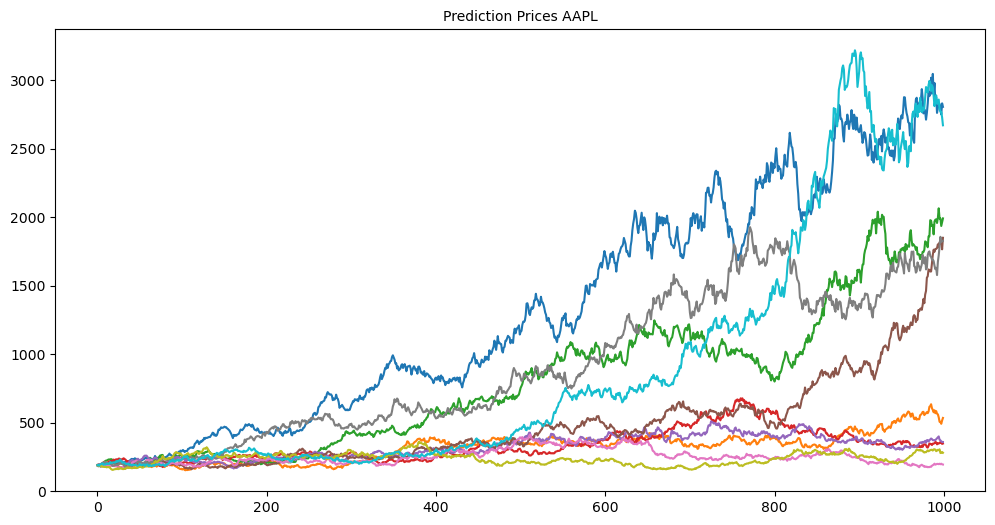

In [28]:
plt.figure(figsize = (12,6))
plt.plot(price_list)
plt.title('Prediction Prices AAPL', size= 10)
plt.show()